## Exploring Weather Trends - Project

### Extract the Data

I have downloaded both global data and Chicago data from the database used in the course. The data then saved in two files naming 'Global Average Temprature' and 'City Average Temprature'.

The data is extracted using sql command

**For global data**
`select * from global_data`

**For City level data**
`select * from city_data where city='Chicago'`

Loading the file in pandas dataframe

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
city_data=pd.read_csv('Chicago_data.csv')
global_data=pd.read_csv('global_data.csv')

In [87]:
city_data = city_data.filter(['year','avg_temp'])

In [88]:
city_data=city_data[(city_data['year']>1749) & (city_data['year']< 2014)]

In [91]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264 entries, 7 to 270
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      264 non-null    int64  
 1   avg_temp  264 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 6.2 KB


In [92]:
mean= city_data['avg_temp'].mean()
city_data['avg_temp']=city_data['avg_temp'].fillna(mean)

In [93]:
city_data['avg_temp'].describe()

count    264.000000
mean      10.070038
std        0.959272
min        4.500000
25%        9.567500
50%       10.110000
75%       10.585000
max       12.820000
Name: avg_temp, dtype: float64

In [94]:
global_data['avg_temp'].describe()

count    266.000000
mean       8.369474
std        0.584747
min        5.780000
25%        8.082500
50%        8.375000
75%        8.707500
max        9.830000
Name: avg_temp, dtype: float64

- **Observation 1**: From the above two observation we can say that the avegarge temperature of Chicago is greatere than the global temperature. 
- **Observation 2**: The minimum temperature of Chicago is less than global minimum. 

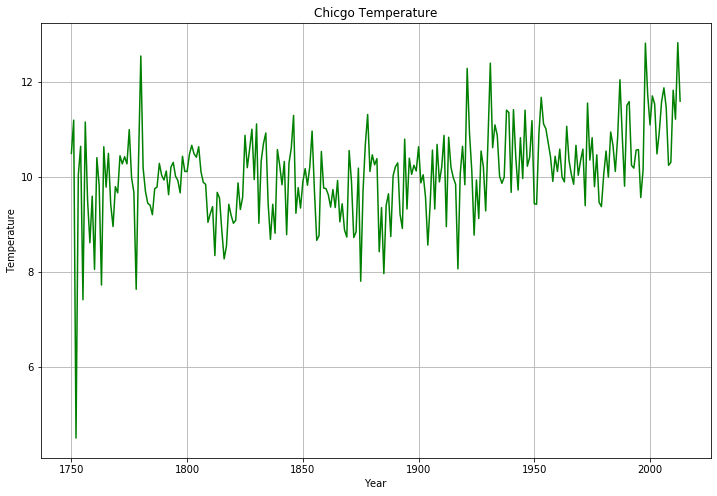

In [95]:
plt.figure(figsize=(12,8))
plt.grid(True)
plt.plot(city_data['year'], city_data['avg_temp'], color='g')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Chicgo Temperature')
plt.show()

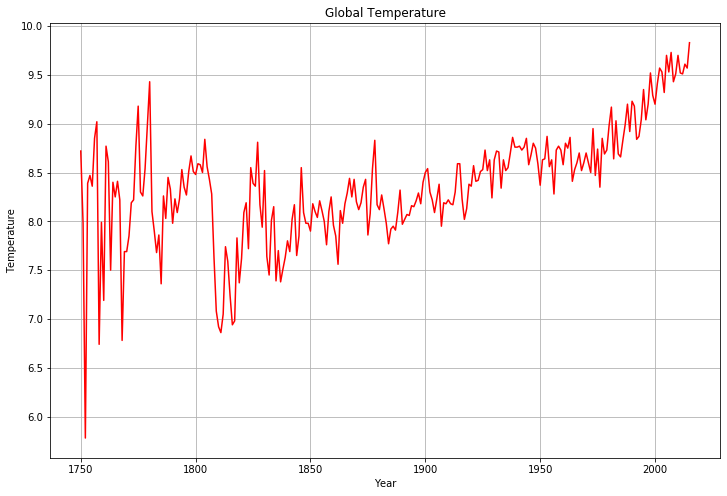

In [96]:
plt.figure(figsize=(12,8))
plt.grid(True)
plt.plot(global_data['year'], global_data['avg_temp'], color='r')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Global Temperature')
plt.show()

- **Observation 3**:From the plot above we can observe that there is a constant increment in the global average temperautre after 1950 and is still on-going.

#### Calulating the moving average for both global and city average temperature

In [101]:
city_data['MA_Chicago']=city_data.avg_temp.rolling(11).mean()
global_data['MA_Global']=global_data.avg_temp.rolling(11).mean()

In [107]:
city_data['MA_Chicago'].shape
#global_data['MA_Global'].shape

(264,)

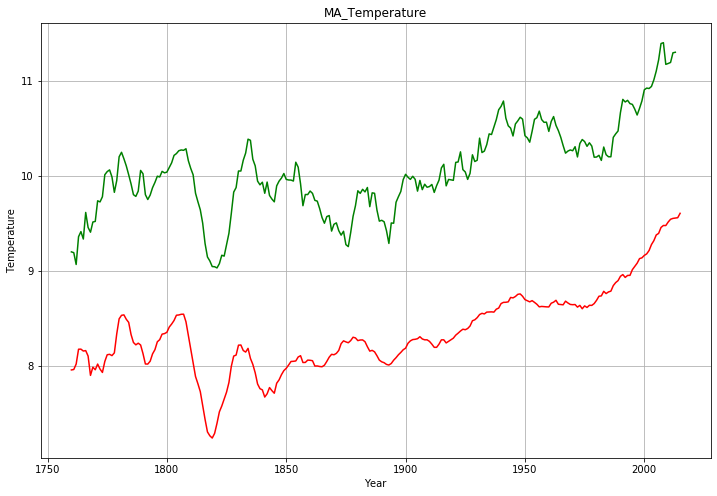

In [102]:
plt.figure(figsize=(12,8))
plt.grid(True)
plt.plot(global_data['year'], global_data['MA_Global'], color='r')
plt.plot(city_data['year'], city_data['MA_Chicago'], color='g')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('MA_Temperature')
plt.show()

Here I have calcualted the moving average of both global and Chicago city.
- **Observation 4**: Around 1820 the temperature has dropped globally.

In [103]:
diff_data= city_data['MA_Chicago']- global_data['MA_Global']

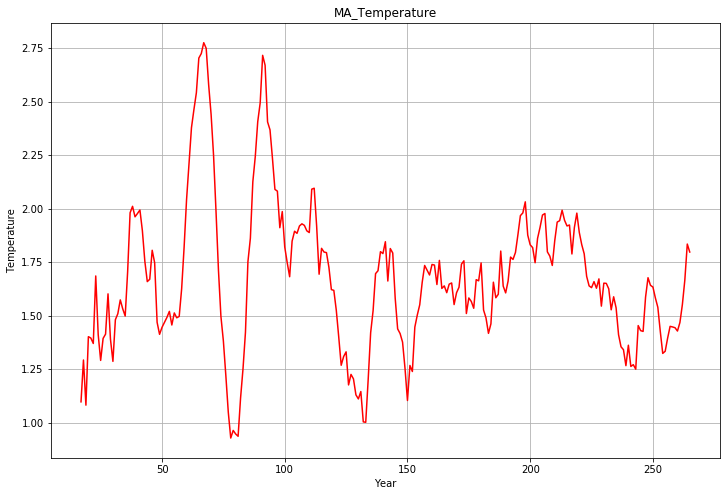

In [110]:
plt.figure(figsize=(12,8))
plt.grid(True)
plt.plot(diff_data, color='r')
##plt.plot(city_data['year'], city_data['MA_Chicago'], color='g')
plt.xlabel('Difference')
plt.ylabel('Temperature')
plt.title('MA_Temperature')
plt.show()

- **Observation 5**:The maximum difference in moving average temperature between Chicago and Global is 2.74 
  degree and from the figure it clear that over the time difference is not very much.